In [159]:
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from scipy.stats import norm


def d1_v(St, K, sigma, expir_t, r):
    d1 = (math.log(St/K) + (r+0.5*sigma**2)*expir_t)/(sigma*expir_t**0.5)
    N1 = norm.cdf(d1)
    return N1

def d2_v(St, K, sigma, expir_t, r):
    d2 = (math.log(St/K) + (r-0.5*sigma**2)*expir_t)/(sigma*expir_t**0.5)
    N2 = norm.cdf(d2)
    return N2

def h1_v(St, H, K, r, sigma, et):
    h1 = (math.log(H**2/(St*K))+(r+0.5*sigma**2)*et)/(sigma*et**0.5)
    NH1 = norm.cdf(h1)
    return NH1

def h2_v(St, H, K, r, sigma, et):
    h2 = (math.log(H**2/(St*K))+(r-0.5*sigma**2)*et)/(sigma*et**0.5)
    NH2 = norm.cdf(h2)
    return NH2

def DO_v(St, H, K, sigma, r, et):
    NH1 = h1_v(St, H, K, r, sigma, et)
    NH2 = h2_v(St, H, K, r, sigma, et)
    N1 = d1_v(St, K, sigma, et, r)
    N2 = d2_v(St, K, sigma, et, r)
    HS1 = (H/St)**(1+2*r*sigma**(-2))
    HS2 = (H/St)**(-1+2*r*sigma**(-2))
    dis_f = K * math.exp(-r*et)
    CDO = St*N1 - HS1*St*NH1 - dis_f*N2 + dis_f*HS2*NH2
    return CDO

def DI_v(St, H, K, sigma, r, et):
    NH1 = h1_v(St, H, K, r, sigma, et)
    NH2 = h2_v(St, H, K, r, sigma, et)
    HS1 = (H/St)**(1+2*r*sigma**(-2))
    HS2 = (H/St)**(-1+2*r*sigma**(-2))
    dis_f = K * math.exp(-r*et)
    CDI = HS1*St*NH1 - dis_f*HS2*NH2
    return CDI    

def gama_v(St, K, sigma, expir_t, r):
    d1 = (math.log(St/K) + (r+0.5*sigma**2)*expir_t)/(sigma*expir_t**0.5)
    N11 = norm.pdf(d1)
    gama = 1/(St*sigma*expir_t**0.5) * N11
    return gama

def DO_value(path, H, K, sigma, T, N):
    CDO_path = []
    dt = T/N
    paths_gone = []
    for i in range(N):
        St = path[i]
        paths_gone.append(St)
        et = T - i*dt
        if min(paths_gone) > H:
            DO_vt = DO_v(St, H, K, sigma, r, et)
        else:
            DO_vt = 0
        CDO_path.append(DO_vt)
    return CDO_path

def DI_value(path, H, K, sigma, T, N):
    CDI_path = []
    dt = T/N
    paths_gone = []
    for i in range(N):
        St = path[i]
        et = T - i*dt
        paths_gone.append(St)
        if min(paths_gone)>H:
            DI_vt = DI_v(St, H, K, sigma, r, et)
        else:
            DI_vt = Ct_v(St, K, sigma, et, r)
        CDI_path.append(DI_vt)
    return CDI_path

def Ct_v(St, K, sigma, expir_t, r):
    N1 = d1_v(St, K, sigma, expir_t, r)
    N2 = d2_v(St, K, sigma, expir_t, r)
    Ct = St*N1 - K*math.exp(-r*expir_t)*N2
    return Ct

def Ct_value(path, K, T, N, sigma):
    dt = T/N
    Ct_path = []
    Deltas = []
    Deltas_dis = []
    for i in range(N):
        St = path[i]
        Ti = T - i*dt
        Ct = Ct_v(St, K, sigma, Ti, r)
        Ct_path.append(Ct)
    return Ct_path

def St_simulation_SDE(S0, T, N, r, sig):
    dt = T/N
    dBs = np.random.normal(0, dt**0.5, N)
    path = []
    St = S0
    path.append(St)
    for i,dB_i in enumerate(dBs):
        St = St + sig*St*dB_i+r*St*dt
        path.append(St)
    return path


def plot_path_price(paths, names, T, xname, yname):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    num = len(names)
    plt.figure(figsize=(6, 4))
    plt.rcParams['savefig.dpi'] = 200
    plt.rcParams['figure.dpi'] = 200
    for i in range(num):
        path_i = paths[i]
        num_ps = len(path_i)  
        index = [i*T/(num_ps-1) for i in range(num_ps)]
        plt.plot(index, path_i, color=colors[i], 
                 linestyle="-", linewidth=0.9, label=names[i])
        
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title('{}@{}'.format(yname,xname))
    plt.legend()
    sns.set()
    plt.show()
    
    
def plot_path(paths, idx, names, T, xname, yname):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    num = len(names)
    plt.figure(figsize=(6, 4))
    plt.rcParams['savefig.dpi'] = 200
    plt.rcParams['figure.dpi'] = 200
    for i in range(num):
        path_i = paths[i]
        num_ps = len(path_i)  
        #index = [i*T/(num_ps-1) for i in range(num_ps)]
        plt.plot(idx, path_i, color=colors[i], 
                 linestyle="-", linewidth=0.9, label=names[i])
    
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.title('{}@{}'.format(yname,xname))
    plt.legend()
    sns.set()
    plt.show()

# 1 Tylor expansion approximation of profits and loss 

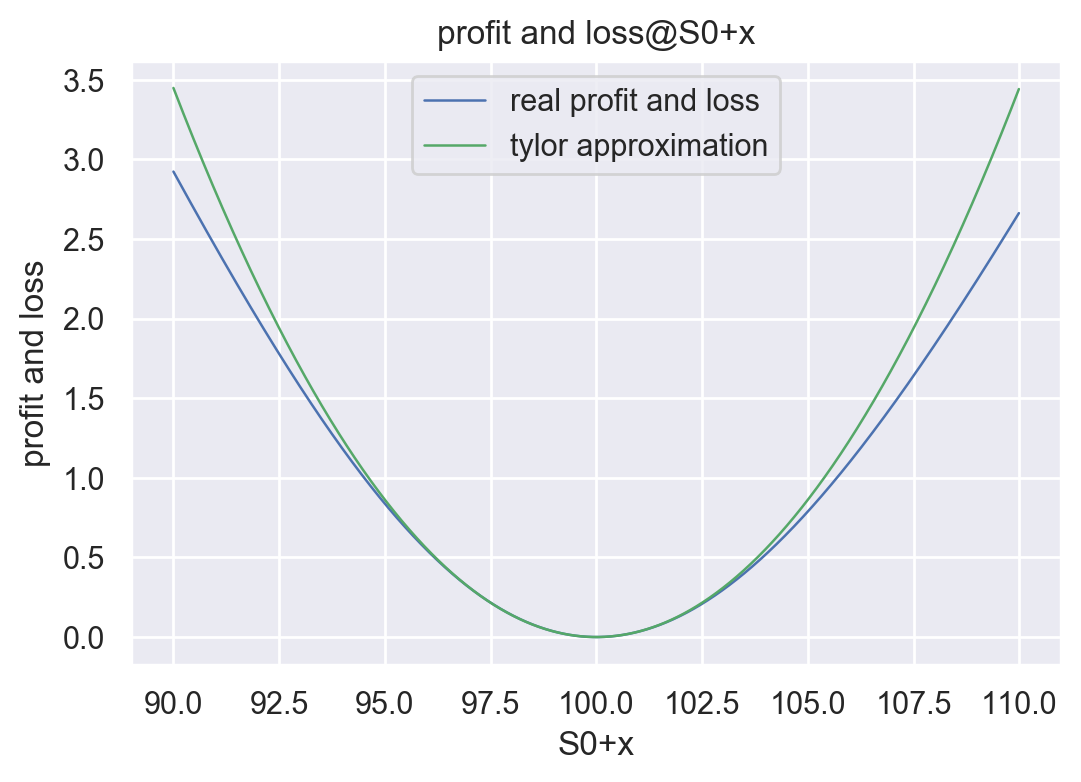

In [172]:
S0 = 100
K =100
r = 0.02
T = 1/12
t = 0.0
sigma = 0.20

et = T-t
PL_real = []
PL_tylor = []
idx = []

C0 = Ct_v(S0, K, sigma, et, r)
gama = gama_v(S0, K, sigma, et, r)
delta = d1_v(S0, K, sigma, et, r)

for i in range(-1000,1000, 1):
    x = i * 0.01
    S_i = S0+x
    idx.append(S_i)
    Ct = Ct_v(S_i, K, sigma, et, r)
    pl_real = Ct - C0 - delta*x
    PL_real.append(pl_real)
    pl_tylor = 0.5*gama*x**2
    PL_tylor.append(pl_tylor)

    
paths = [PL_real, PL_tylor]
names = ['real profit and loss', 'tylor approximation']

xname = 'S0+x'
yname = 'profit and loss'
plot_path(paths, idx, names, T, xname, yname)
    

# Exercise 2 : Pricing Barrier options

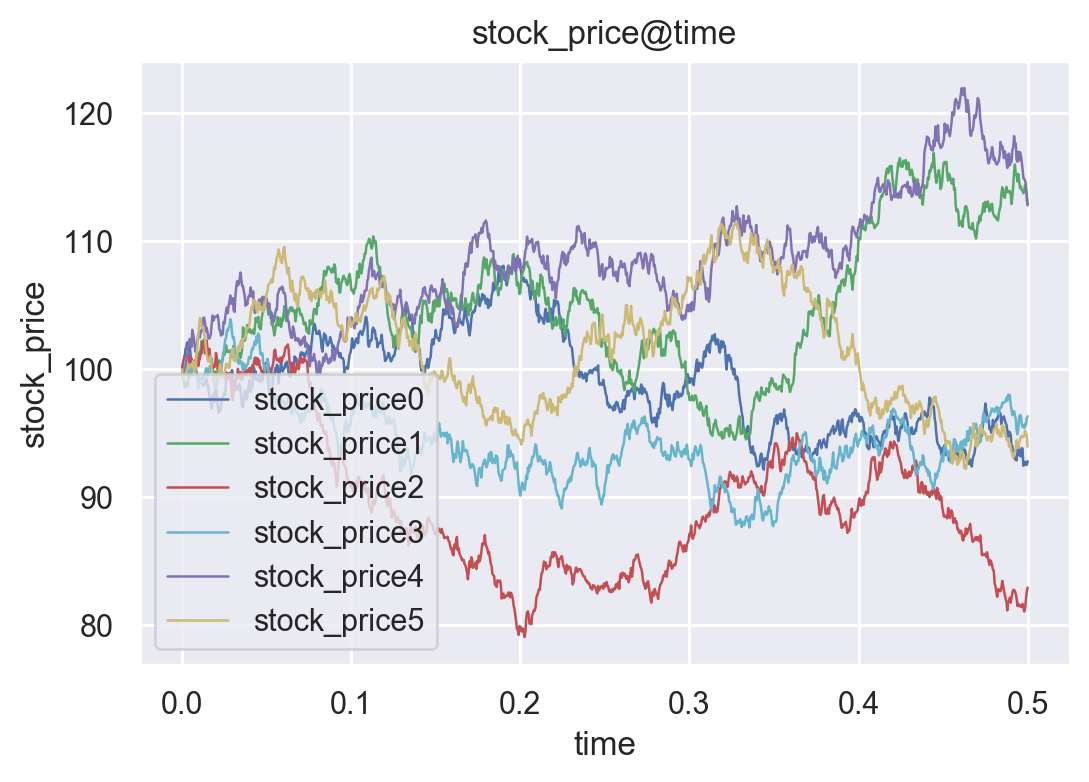

In [23]:
S0=100
T = 1/2
N = 1000
r=0.05
K = 105
Sig = 0.20
Barier = 120
paths = []
names = []
# sumulate stock price with 
for i in range(6):
    Sts = St_simulation_SDE(S0, T, N, r, Sig)
    paths.append(Sts)
    names.append('stock_price{}'.format(i))
    
xname = 'time'
yname = 'stock_price'
plot_path_price(paths, names, T, xname, yname)

# get path that hits or does not hit barrier

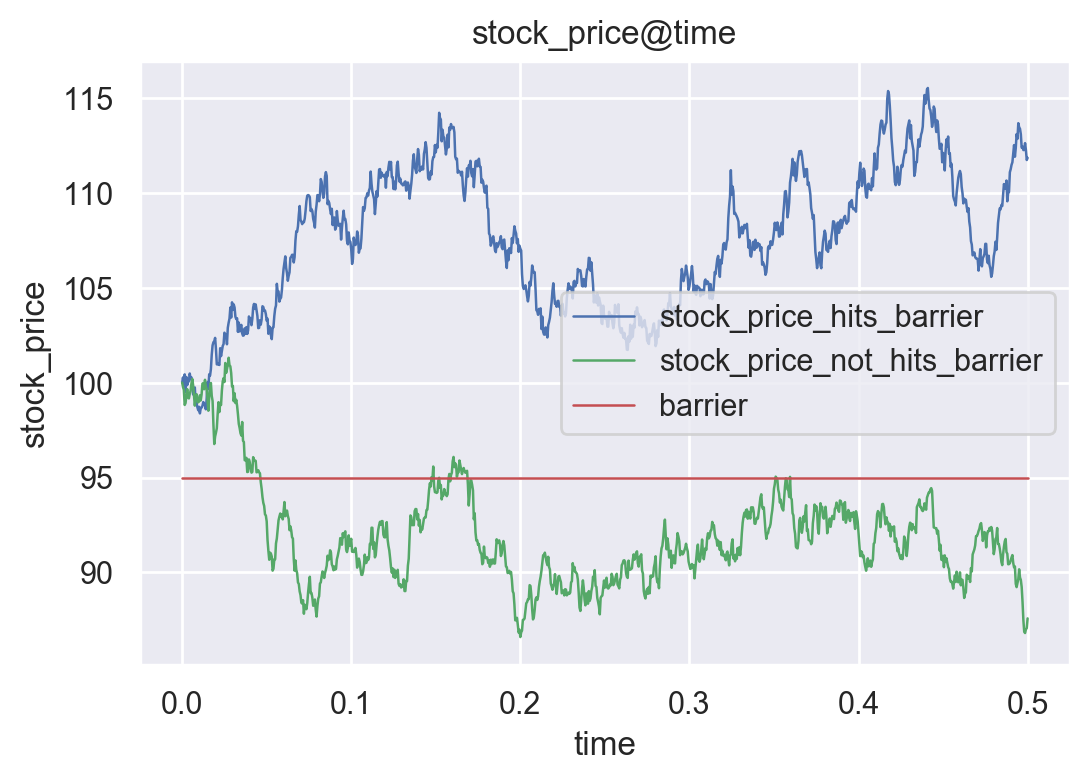

In [189]:
S0=100
T = 1/2
N = 1000
r=0.05
K = 105
Sig = 0.20
H = 95
paths = []
names = []
Bariers = [H for i in range(N)]

# sumulate stock path that does not hit the barrier:
min_st = -100
while min_st < H:
    Sts_do = St_simulation_SDE(S0, T, N, r, Sig)
    min_st = min(Sts_do)


# sumulate stock path that hits the barrier:
min_st = 1000
while min_st > H:
    Sts_di = St_simulation_SDE(S0, T, N, r, Sig)
    min_st = min(Sts_di)

paths.append(Sts_do)
paths.append(Sts_di)
names.append('stock_price_hits_barrier')
names.append('stock_price_not_hits_barrier')
paths.append(Bariers)
names.append('barrier')
xname = 'time'
yname = 'stock_price'
plot_path_price(paths, names, T, xname, yname)

# 2.1 pricing for down and out option

## 2.1.1 down and out with $S_{min}>H$

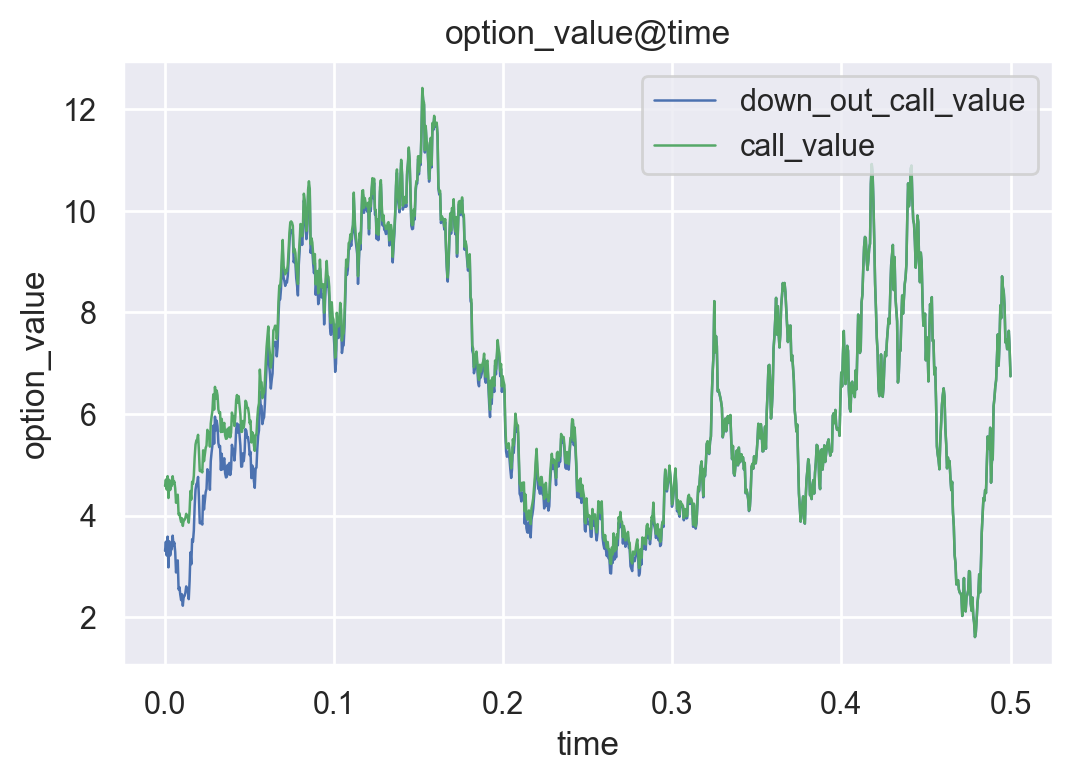

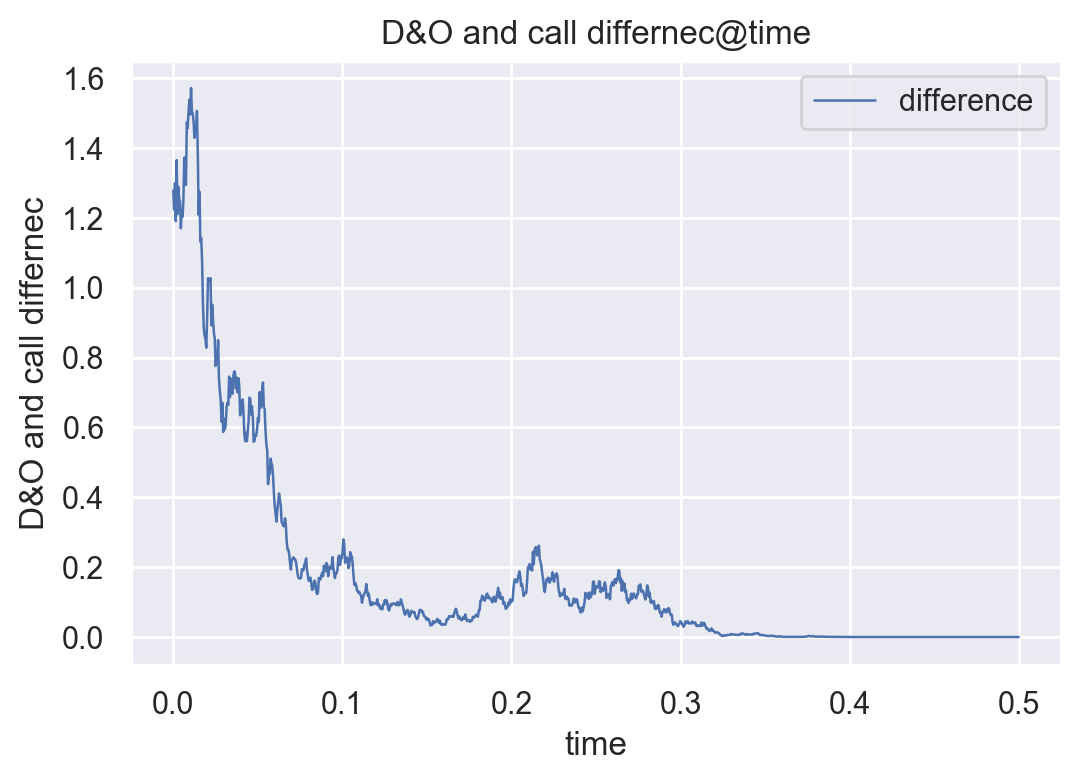

In [194]:
N=1000
DO_path = DO_value(Sts_do, H, K, sigma, T, N)
COt_path = Ct_value(Sts_do, K, T, N, sigma)

paths = [DO_path, COt_path]
names = ['down_out_call_value', 'call_value']
xname = 'time'
yname = 'option_value'
plot_path_price(paths, names, T, xname, yname)


diff = (np.array(COt_path) - np.array(DO_path)).tolist()
names = ['difference']
xname = 'time'
yname = 'D&O and call differnec'
paths = [diff]
plot_path_price(paths, names, T, xname, yname)

## 2.1.2 down and out with $S_{min}<H$

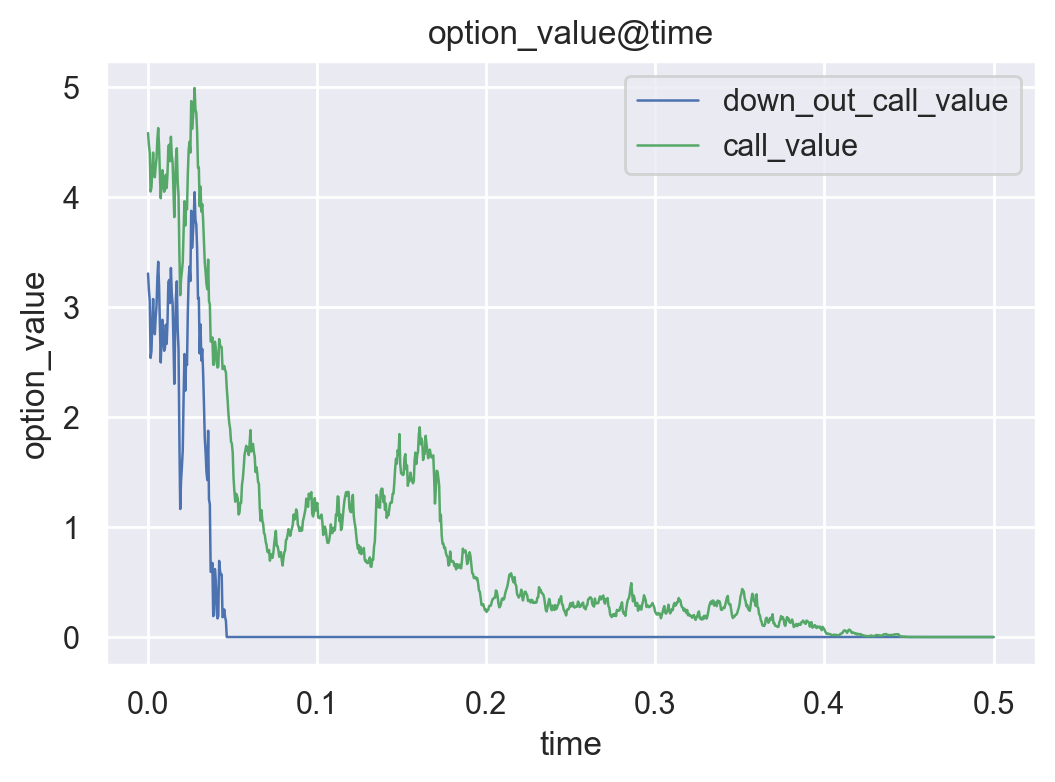

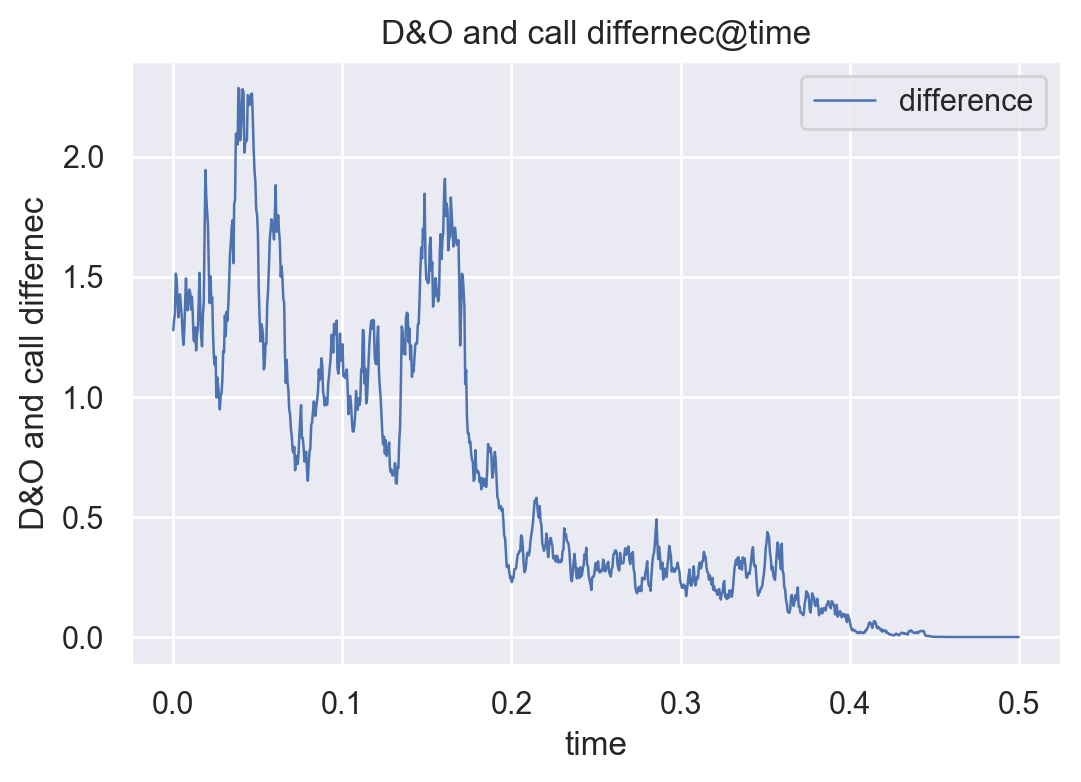

In [195]:
N=1000
DO_path = DO_value(Sts_di, H, K, sigma, T, N)
COt_path = Ct_value(Sts_di, K, T, N, sigma)
paths = [DO_path, COt_path]
names = ['down_out_call_value', 'call_value']
xname = 'time'
yname = 'option_value'
plot_path_price(paths, names, T, xname, yname)

diff = (np.array(COt_path) - np.array(DO_path)).tolist()
names = ['difference']
xname = 'time'
yname = 'D&O and call differnec'
paths = [diff]
plot_path_price(paths, names, T, xname, yname)

# 2.2 pricing for down and in option

## 2.2.1 down and in with $S_{min}<H$

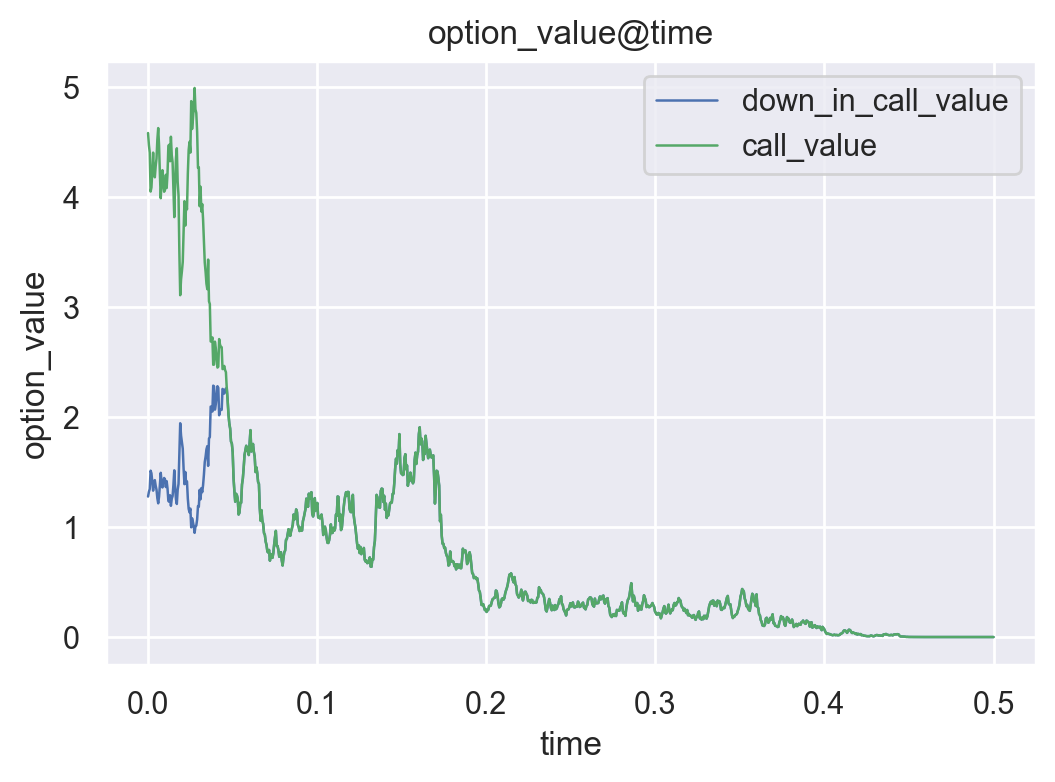

In [196]:
DI_path = DI_value(Sts_di, H, K, sigma, T, N)
CIt_path = Ct_value(Sts_di, K, T, N, sigma)
paths = [DI_path, CIt_path]
names = ['down_in_call_value', 'call_value']
xname = 'time'
yname = 'option_value'
plot_path_price(paths, names, T, xname, yname)

## 2.2.2 down and in with $S_{min}>H$

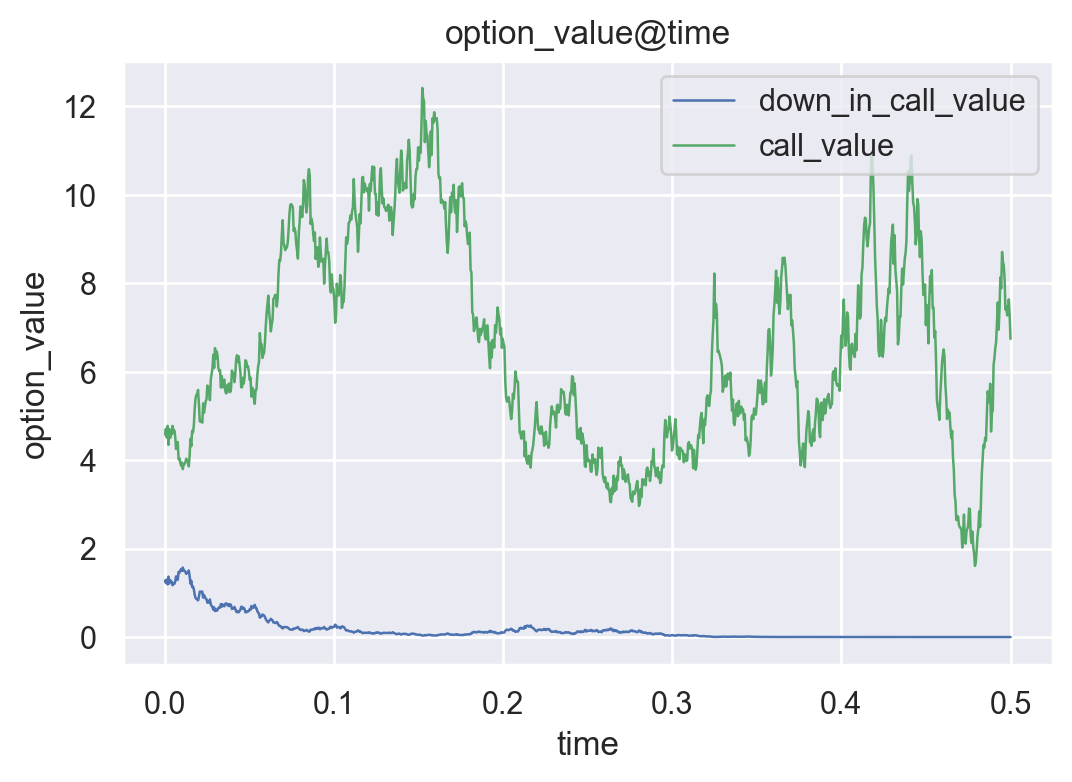

In [197]:
DI_path = DI_value(Sts_do, H, K, sigma, T, N)
CIt_path = Ct_value(Sts_do, K, T, N, sigma)
paths = [DI_path, CIt_path]
names = ['down_in_call_value', 'call_value']
xname = 'time'
yname = 'option_value'
plot_path_price(paths, names, T, xname, yname)

# 2.4 stock price and down-and-out call option value with different expirations

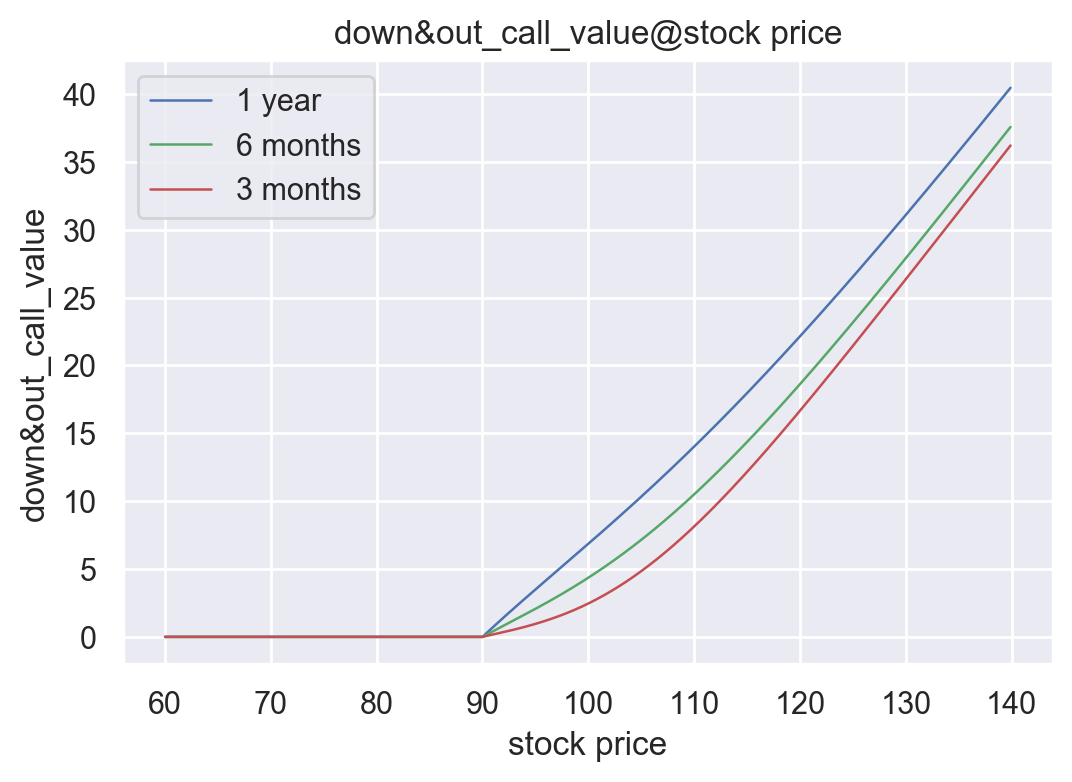

In [205]:
r=0.05
K = 105
H = 90
sigma = 0.20

Et1 = 1
Et2 = 1/2
Et3 = 1/4
N1 = 800
Sts = [i*0.1+60 for i in range(N1)]


def get_ps(Sts, H, K, sigma, Et1):
    DO_vts = []
    for S_i in Sts:
        if S_i > H:
            DO_vt = DO_v(S_i, H, K, sigma, r, Et1)
        else:
            DO_vt = 0
        DO_vts.append(DO_vt)
    return DO_vts

Do_path1 = get_ps(Sts, H, K, sigma, Et1)
Do_path2 = get_ps(Sts, H, K, sigma, Et2)
Do_path3 = get_ps(Sts, H, K, sigma, Et3)

paths = [Do_path1, Do_path2, Do_path3]
names = ['1 year', '6 months', '3 months']
xname = 'stock price'
yname = 'down&out_call_value'
plot_path(paths, Sts, names, T, xname, yname)

# 2.5 stock price and down-and-in call option value with different expirations

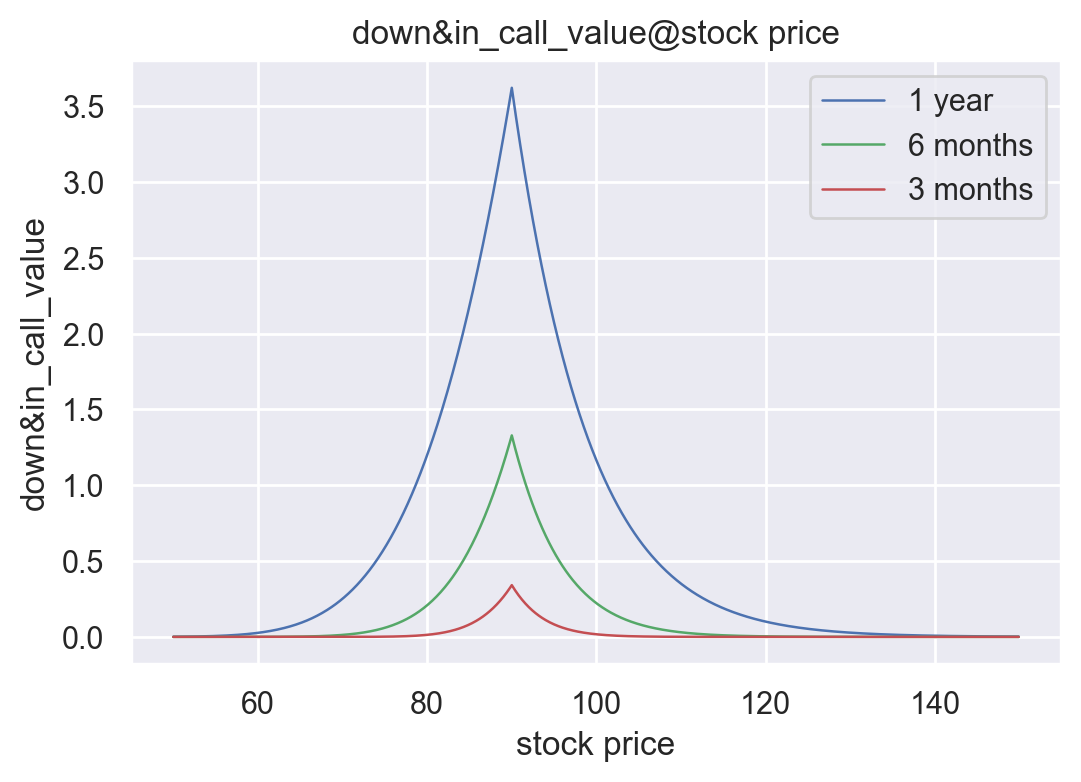

In [204]:
Et1 = 1
Et2 = 1/2
Et3 = 1/4
N1 = 1000
r=0.05
K = 105
H = 90
sigma = 0.20

Sts = [i*0.1+50 for i in range(N1)]


def get_dis(Sts, H, K, sigma, Et1):
    DI_vts = []
    CS = []
    for S_i in Sts:
        if S_i < H:
            DI_vt = Ct_v(S_i, K, sigma, Et1, r) 
        else:
            DI_vt = DI_v(S_i, H, K, sigma, r, Et1)
        DI_vts.append(DI_vt)
    return DI_vts



DI_path1 = get_dis(Sts, H, K, sigma, Et1)
DI_path2 = get_dis(Sts, H, K, sigma, Et2)
DI_path3 = get_dis(Sts, H, K, sigma, Et3)


paths = [DI_path1, DI_path2, DI_path3]
names = ['1 year', '6 months', '3 months']
xname = 'stock price'
yname = 'down&in_call_value'
plot_path(paths, Sts, names, T, xname, yname)

# 2.6 stock price and call option value with different expiration

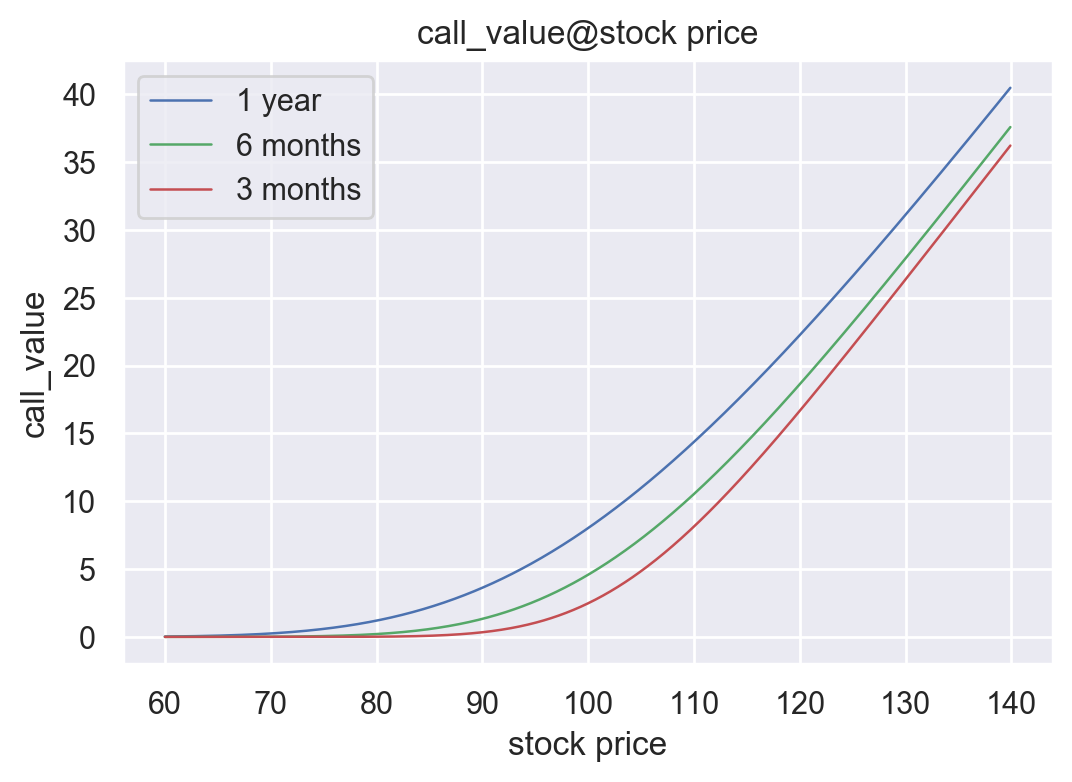

In [200]:
Et1 = 1
Et2 = 1/2
Et3 = 1/4
N1 = 800
r=0.05
K = 105
Sig = 0.20
sigma = 0.2

Sts = [i*0.1+60 for i in range(N1)]

def get_cts(Sts, H, K, sigma, Et):
    C_vts = []
    for S_i in Sts:
        C_vt = Ct_v(S_i, K, sigma, Et, r)
        C_vts.append(C_vt)
    return C_vts

Ct_path1 = get_cts(Sts, H, K, sigma, Et1)
Ct_path2 = get_cts(Sts, H, K, sigma, Et2)
Ct_path3 = get_cts(Sts, H, K, sigma, Et3)

paths = [Ct_path1, Ct_path2, Ct_path3]
names = ['1 year', '6 months', '3 months']
xname = 'stock price'
yname = 'call_value'
plot_path(paths, Sts, names, T, xname, yname)